<a href="https://colab.research.google.com/github/TruongVanDuc19146177/AI/blob/main/ANN_cifar_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.datasets import cifar100
from tensorflow.keras.optimizers import Adam, SGD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from random import randint
from google.colab.patches import cv2_imshow
from tensorflow.keras.utils import to_categorical

In [ ]:
#tai du lieu 
(x_train,y_train),(x_test,y_test) = cifar100.load_data()
#gan bien 
X = x_test;


 

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0
y_train = to_categorical(y_train,100)
y_test = to_categorical(y_test,100)

In [ ]:
#chuyen thanh dang vecto 
x_train=x_train.reshape(50000,1024)
x_test=x_test.reshape(10000,1024)
 

In [ ]:
# Tạo Model
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100,activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=SGD(),metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=64, epochs=128,verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test accuracy:', score[1])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense_20 (Dense)            (None, 512)               1573376   
                                                                 
 dropout_18 (Dropout)        (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 100)               25700     
                                                                 
Total params: 1,730,404
Trainable params: 1,730,404
No

In [ ]:
#luu model 
model.save('ANN_cifar_100.h5')

In [ ]:
#danh gia model
score = model.evaluate(x_test, y_test, verbose = 1)
 

313/313 [==============================] - 1s 2ms/step - loss: 2.9513 - accuracy: 0.2938


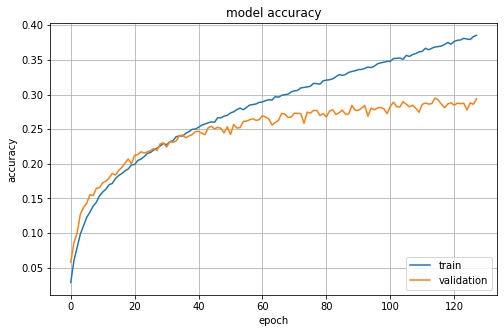

In [ ]:
# Graphs of accuracy
plt.figure(figsize=(8,5))
plt.grid(True)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='lower right')
plt.show()

In [ ]:
classes = ['beaver', 'dolphin', 'otter', 'seal', 'whale','aquarium fish', 'flatfish', 'ray', 'shark', 'trout', 'orchids',
           'poppies', 'roses', 'sunflowers', 'tulips','bottles', 'bowls', 'cans', 'cups', 'plates',	'apples', 'mushrooms', 
           'oranges', 'pears', 'sweet peppers','clock', 'computer keyboard', 'lamp', 'telephone', 'television', 'bed', 'chair',
           'couch', 'table', 'wardrobe', 'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach', 'bear', 'leopard', 'lion', 'tiger',
           'wolf', 'bridge', 'castle', 'house', 'road', 'skyscraper', 'cloud', 'forest', 'mountain', 'plain', 'sea', 'camel', 'cattle',
           'chimpanzee', 'elephant', 'kangaroo', 'fox', 'porcupine', 'possum', 'raccoon', 'skunk', 'crab', 'lobster', 'snail', 'spider', 
           'worm','baby', 'boy', 'girl', 'man', 'woman', 'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle', 'hamster', 'mouse', 'rabbit',
           'shrew', 'squirrel', 'maple', 'oak', 'palm', 'pine', 'willow', 'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train', 'lawn-mower', 
           'rocket', 'streetcar', 'tank', 'tractor']

y_pred=model.predict(x_test)

'tiger'

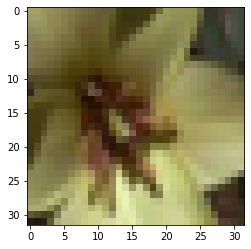

In [ ]:
plt.imshow(X[5])
label=int(np.argmax(y_pred[5]))
classes[label]